C:\Users\AYAAN QURESHI\AppData\Local\Temp\ipykernel_12196\2338505404.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  self.df[selected_columns].hist(ax=self.ax)


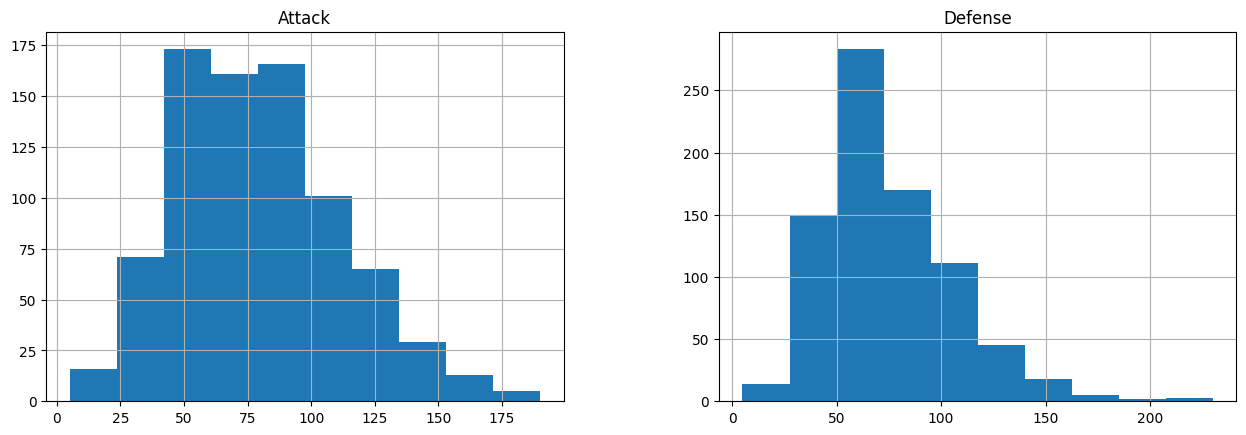

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class DataVisualizer:
    def __init__(self, root):
        self.root = root
        self.root.title("Data Visualizer")

        self.file_path = None
        self.df = None
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.browse_button = tk.Button(root, text="Browse Files", command=self.browse_files)
        self.browse_button.pack(side=tk.TOP, pady=10)

        self.checkboxes = {
            "Bar Chart": tk.IntVar(),
            "Histogram": tk.IntVar(),
            "Pie Chart": tk.IntVar(),
            "Box Plot": tk.IntVar(),
        }

        self.column_label = tk.Label(root, text="Select Columns:")
        self.column_label.pack(side=tk.TOP, pady=5)

        self.column_listbox = tk.Listbox(root, selectmode=tk.MULTIPLE)
        self.column_listbox.pack(side=tk.TOP, pady=5)

        for checkbox_text, var in self.checkboxes.items():
            checkbox = tk.Checkbutton(root, text=checkbox_text, variable=var, command=self.plot)
            checkbox.pack(side=tk.TOP)

    def browse_files(self):
        self.file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if self.file_path:
            self.df = pd.read_csv(self.file_path)
            columns = self.df.columns
            self.column_listbox.delete(0, tk.END)
            for col in columns:
                self.column_listbox.insert(tk.END, col)
            self.plot()

    def plot(self):
        if self.df is not None:
            self.ax.clear()
            selected_columns = [self.column_listbox.get(idx) for idx in self.column_listbox.curselection()]

            for chart, var in self.checkboxes.items():
                if var.get() == 1:
                    if chart == "Bar Chart":
                        if all(self.df[col].dtype.kind in 'biufc' for col in selected_columns):
                            self.df[selected_columns].plot(kind='bar', ax=self.ax)
                        else:
                            print("Selected columns for Bar Chart must be numeric.")
                    elif chart == "Histogram":
                        self.df[selected_columns].hist(ax=self.ax)
                    elif chart == "Pie Chart":
                        if all(self.df[col].dtype.kind in 'biufc' for col in selected_columns):
                            self.df[selected_columns].iloc[0].plot.pie(ax=self.ax)
                        else:
                            print("Selected columns for Pie Chart must be numeric.")
                    elif chart == "Box Plot":
                        self.df[selected_columns].plot(kind='box', ax=self.ax)

            self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = DataVisualizer(root)
    root.mainloop()
